In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import datetime
import sys
sys.path.append("..")
from train import BodyPartsMeasurementTrainer
from body_parts_measurement_data_generator import BodyPartsMeasurementDataGenerator
import tensorflow as tf
from evaluator import Evaluator
from model.model import get_model
from tqdm import tqdm

In [4]:
config = {
	# model
	'input_shape': [256,256,3],     # 훈련 이미지 크기
	'batch_size': 4,                # 배치 사이즈
	'path_pretrained': r"C:\AI_class_yang\AI_code\신체 치수 예측\body_part_measurement_source\body_part_measurement\blazepose_attention_0_3.2034787193590604.h5",        # pretrained 모델 경로
	# 'path_pretrained': None,
	'type_backbone': "blazepose",   # backbone type (blazepose, mbnv3)
	
	# loss
	'type_loss_fn': 'wing',         # 손실 함수 설정 (wing, mae)
	
	# data
	'seg_shape': [64,64],           # segmentation 크기 *미사용
	'path_classes': "../seg_classes.txt",   # segmentation class 정보 *미사용
	'shuffle': True,                # 데이터 섞기
	'is_normalized': False,         # normalize 데이터
	'is_with_seg': False,           # segmentation 사용 여부 *미사용
	'path_dataset': r"F:\AI_Project_Img_Process", # 데이터 경로
	## attention type              
	'type_attention': "regression", # attention 종류 (regression, categorical, none)
	'num_category_bmi': 10,         # categorical 시의 bmi category 갯수 변수
	'num_category_height': 10,      # categorical 시의 height category 갯수 변수
	'has_filename': False,

	# train
	'epochs': 3,                   # 훈련 epoch 수
	'eval_term': 1                  # 평가 빈도
}

In [5]:
model = get_model(config)

In [6]:
# model.load_weights('blazepose_attention_31features_731train_mf/blazepose_attention_0_2.994556342230903.h5')
model.load_weights(r'C:\AI_class_yang\AI_code\신체 치수 예측\body_part_measurement_source\body_part_measurement\scripts\blazepose_attention_0_3.022645455819589.h5')

In [7]:
data_generator_test = BodyPartsMeasurementDataGenerator(config, data_type="test")
len(data_generator_test)

list_user_dirs ['F012', 'F021', 'F022', 'F024', 'F025', 'F053', 'F056', 'F061', 'F080', 'F088', 'F090', 'F110', 'F119', 'F120', 'F121', 'F123', 'F128', 'F134', 'F151', 'F183', 'F225', 'F238', 'F267', 'F288', 'F296', 'F310', 'F311', 'F317', 'F336', 'F341', 'F355', 'F366', 'F368', 'F375', 'F386', 'F388', 'F397', 'F399', 'F421', 'F423', 'F454', 'F464', 'F465', 'F487', 'F491', 'F497', 'M009', 'M028', 'M031', 'M044', 'M064', 'M068', 'M072', 'M100', 'M106', 'M109', 'M139', 'M142', 'M144', 'M162', 'M169', 'M178', 'M185', 'M195', 'M206', 'M229', 'M231', 'M232', 'M270', 'M284', 'M304', 'M306', 'M314', 'M319', 'M328', 'M348', 'M349', 'M352', 'M371', 'M377', 'M382', 'M386', 'M388', 'M411', 'M421', 'M443', 'M458', 'M469', 'M474', 'M491', 'M492', 'M501']


2484

In [8]:
evaluator = Evaluator(data_generator_test, model)

In [ ]:

# evaluator.run_evaluation()
evaluator.run_evaluation_new()

  0%|          | 0/2484 [00:00<?, ?it/s]

In [8]:
np_diff_parts_measurements = np.squeeze(np.array(evaluator.list_diff_parts_measurements))
np_diff_percentage_parts_measurements = np.squeeze(np.array(evaluator.list_diff_percentage_parts_measurements))
list_part_mapes = []
for idx in range(np_diff_parts_measurements.shape[1]) :
	part_mape = sum(np_diff_percentage_parts_measurements[:,idx])/np_diff_parts_measurements.shape[0]
	print(idx, part_mape)
	#print(sum(np_diff_percentage_parts_measurements[:,idx])/np_diff_parts_measurements.shape[0])
	list_part_mapes.append(part_mape)
print("mape",sum(list_part_mapes)/len(list_part_mapes))

IndexError: tuple index out of range

In [9]:
iter_data_generator_test = iter(data_generator_test)

In [10]:
data = next(iter_data_generator_test)
print(data)

[array([[[[ 81.,  75.,  76.],
         [ 82.,  84.,  78.],
         [ 72.,  71.,  69.],
         ...,
         [182., 168., 162.],
         [181., 167., 161.],
         [179., 165., 159.]],

        [[ 63.,  57.,  57.],
         [ 87.,  93.,  93.],
         [ 75.,  80.,  80.],
         ...,
         [183., 169., 163.],
         [181., 167., 161.],
         [180., 166., 160.]],

        [[ 62.,  36.,  37.],
         [ 78.,  73.,  74.],
         [ 80.,  74.,  75.],
         ...,
         [183., 170., 164.],
         [182., 168., 162.],
         [180., 166., 160.]],

        ...,

        [[214., 200., 188.],
         [213., 201., 191.],
         [211., 199., 189.],
         ...,
         [195., 183., 173.],
         [194., 182., 172.],
         [190., 178., 168.]],

        [[213., 201., 191.],
         [211., 196., 187.],
         [213., 198., 189.],
         ...,
         [197., 184., 175.],
         [194., 181., 171.],
         [194., 182., 172.]],

        [[214., 201., 188.],
      

C:\Users\user\AppData\Local\Temp\ipykernel_32716\3747738581.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.imshow(data[0][0,:,:,::-1].astype(np.int))


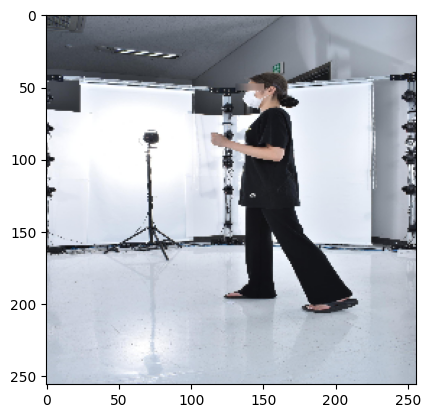

In [11]:
plt.imshow(data[0][0,:,:,::-1].astype(np.int))
plt.show()

In [12]:
result = model.predict([data[0], data[2]])

1/1 [==============================] - 0s 23ms/step


In [13]:
result[0]

array([138.32373  ,  81.71346  , 121.473724 , 100.79477  ,  74.16317  ,
        42.421593 ,  53.210712 ,  30.16333  ,  81.950584 ,  67.04444  ,
        72.49179  ,  87.38764  ,  49.137493 ,  33.772285 ,  34.189304 ,
        19.892082 ,  24.19017  ,  24.845873 ,  21.44455  ,  14.098833 ,
        29.916315 ,  52.592327 ,  34.87808  ,  21.745422 ,  11.05244  ,
        23.225113 ,   9.094967 ,  12.051038 ,  17.301704 ,   9.369247 ,
         7.3933425], dtype=float32)

In [14]:
data[1][0]

array([137.8,  83.2, 123.3, 100.1,  75.4,  42.4,  56.5,  30. ,  80.5,
        64.1,  67.2,  87.8,  50.3,  34.6,  32.8,  20.1,  23.7,  24.8,
        21.9,  14. ,  32.6,  57. ,  33.5,  21.2,  10.8,  23.3,   9.3,
        13.8,  17. ,  10.1,   7.6], dtype=float32)

In [15]:
# model = get_model(config)
# model.summary()
# model.load_weights('blazepose_attention_31features_1002train_mf/blazepose_attention_0_3.2034787193590604.h5')
data_generator_test = BodyPartsMeasurementDataGenerator(config, data_type="test")

list_user_dirs ['F004', 'M004']


In [16]:
f_w = open("eval_results_test.txt","w")
f_w.write("Evaluation Started At "+datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "\n")

list_mape = []
list_diff_percentage_parts_measurements = []



for idx in tqdm(range(len(data_generator_test))) :
	try :
		batch_data = data_generator_test.get_data(idx)
	except :
		print("idx",idx,"wrong")
	# batch_images, batch_body_parts_measurement, batch_categorical_bmi_and_height, filename = batch_data
	batch_images, batch_body_parts_measurement, batch_categorical_bmi_and_height = batch_data
	batch_images, batch_body_parts_measurement, batch_categorical_bmi_and_height = np.expand_dims(batch_images, axis=0), np.expand_dims(batch_body_parts_measurement, axis=0), np.expand_dims(batch_categorical_bmi_and_height, axis=0)

	pd_parts_measurements = model.predict([batch_images, batch_categorical_bmi_and_height])
	batch_diff_parts_measurements = abs(batch_body_parts_measurement - pd_parts_measurements)
	batch_diff_percentage_parts_measurements = abs(batch_diff_parts_measurements / batch_body_parts_measurement)
	

	mape = sum(batch_diff_percentage_parts_measurements[0]) / len(batch_diff_percentage_parts_measurements[0])

	# str_filename = str(idx) + " filename: " + filename + "\n"
	str_gt = "gt: " + ", ".join(str(x) for x in batch_body_parts_measurement[0]) + "\n"
	str_pd = "pd: " + ", ".join(str(x) for x in pd_parts_measurements[0]) + "\n"
	str_pe = "ape: " + ", ".join(str(x) for x in batch_diff_percentage_parts_measurements[0]) + "\n"
	str_mape = "MAPE : " + str(mape) + "\n\n"

	# f_w.write(str_filename)
	f_w.write(str_gt)
	f_w.write(str_pd)
	f_w.write(str_pe)
	f_w.write(str_mape)

	list_mape.append(mape)
	list_diff_percentage_parts_measurements.append(batch_diff_percentage_parts_measurements)

np_diff_percentage_parts_measurements = np.squeeze(np.array(list_diff_percentage_parts_measurements))
for idx in range(np_diff_percentage_parts_measurements.shape[1]) :
	part_mape = sum(np_diff_percentage_parts_measurements[:,idx])/np_diff_percentage_parts_measurements.shape[0]
	f_w.write("Part MAPE "+ str(idx) + ": " + str(part_mape) + "\n")

f_w.write("MAPE for Test Dataset : " + str(sum(list_mape)/len(list_mape)) + "\n")
f_w.write("Evaluation Ended At "+datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "\n")
f_w.close()

  0%|          | 0/54 [00:00<?, ?it/s]

1/1 [==============================] - 1s 816ms/step


  2%|▏         | 1/54 [00:00<00:48,  1.10it/s]

1/1 [==============================] - 0s 19ms/step


  4%|▎         | 2/54 [00:01<00:22,  2.29it/s]

1/1 [==============================] - 0s 18ms/step


  6%|▌         | 3/54 [00:01<00:14,  3.48it/s]

1/1 [==============================] - 0s 19ms/step


  7%|▋         | 4/54 [00:01<00:10,  4.60it/s]

1/1 [==============================] - 0s 19ms/step


  9%|▉         | 5/54 [00:01<00:08,  5.45it/s]

1/1 [==============================] - 0s 19ms/step


 11%|█         | 6/54 [00:01<00:07,  6.35it/s]

1/1 [==============================] - 0s 18ms/step


 13%|█▎        | 7/54 [00:01<00:06,  7.14it/s]

1/1 [==============================] - 0s 18ms/step


 15%|█▍        | 8/54 [00:01<00:05,  7.72it/s]

1/1 [==============================] - 0s 18ms/step


 17%|█▋        | 9/54 [00:01<00:05,  8.21it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 10/54 [00:01<00:05,  8.42it/s]

1/1 [==============================] - 0s 19ms/step


 20%|██        | 11/54 [00:01<00:04,  8.73it/s]

1/1 [==============================] - 0s 18ms/step


 22%|██▏       | 12/54 [00:02<00:04,  8.98it/s]

1/1 [==============================] - 0s 19ms/step


 24%|██▍       | 13/54 [00:02<00:04,  9.01it/s]

1/1 [==============================] - 0s 19ms/step


 26%|██▌       | 14/54 [00:02<00:04,  9.16it/s]

1/1 [==============================] - 0s 20ms/step


 28%|██▊       | 15/54 [00:02<00:04,  9.16it/s]

1/1 [==============================] - 0s 19ms/step


 30%|██▉       | 16/54 [00:02<00:04,  9.24it/s]

1/1 [==============================] - 0s 21ms/step


 31%|███▏      | 17/54 [00:02<00:04,  9.16it/s]

1/1 [==============================] - 0s 19ms/step


 33%|███▎      | 18/54 [00:02<00:03,  9.21it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▌      | 19/54 [00:02<00:03,  9.20it/s]

1/1 [==============================] - 0s 27ms/step


 37%|███▋      | 20/54 [00:02<00:03,  9.22it/s]

1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 21/54 [00:03<00:03,  9.19it/s]

1/1 [==============================] - 0s 19ms/step


 41%|████      | 22/54 [00:03<00:03,  9.20it/s]

1/1 [==============================] - 0s 18ms/step


 43%|████▎     | 23/54 [00:03<00:03,  9.22it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 24/54 [00:03<00:03,  9.34it/s]

1/1 [==============================] - 0s 18ms/step


 46%|████▋     | 25/54 [00:03<00:03,  9.39it/s]

1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 26/54 [00:03<00:03,  9.27it/s]

1/1 [==============================] - 0s 20ms/step


 50%|█████     | 27/54 [00:03<00:02,  9.14it/s]

1/1 [==============================] - 0s 18ms/step


 52%|█████▏    | 28/54 [00:03<00:02,  9.23it/s]

1/1 [==============================] - 0s 19ms/step


 54%|█████▎    | 29/54 [00:03<00:02,  9.03it/s]

1/1 [==============================] - 0s 19ms/step


 56%|█████▌    | 30/54 [00:04<00:02,  9.10it/s]

1/1 [==============================] - 0s 18ms/step


 57%|█████▋    | 31/54 [00:04<00:02,  9.10it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▉    | 32/54 [00:04<00:02,  9.15it/s]

1/1 [==============================] - 0s 18ms/step


 61%|██████    | 33/54 [00:04<00:02,  9.18it/s]

1/1 [==============================] - 0s 18ms/step


 63%|██████▎   | 34/54 [00:04<00:02,  9.18it/s]

1/1 [==============================] - 0s 18ms/step


 65%|██████▍   | 35/54 [00:04<00:02,  9.25it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 36/54 [00:04<00:01,  9.33it/s]

1/1 [==============================] - 0s 19ms/step


 69%|██████▊   | 37/54 [00:04<00:01,  9.12it/s]

1/1 [==============================] - 0s 18ms/step


 70%|███████   | 38/54 [00:04<00:01,  9.05it/s]

1/1 [==============================] - 0s 21ms/step


 72%|███████▏  | 39/54 [00:05<00:01,  9.16it/s]

1/1 [==============================] - 0s 20ms/step


 74%|███████▍  | 40/54 [00:05<00:01,  9.16it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 41/54 [00:05<00:01,  9.08it/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████▊  | 42/54 [00:05<00:01,  9.13it/s]

1/1 [==============================] - 0s 19ms/step


 80%|███████▉  | 43/54 [00:05<00:01,  9.14it/s]

1/1 [==============================] - 0s 19ms/step


 81%|████████▏ | 44/54 [00:05<00:01,  9.20it/s]

1/1 [==============================] - 0s 20ms/step


 83%|████████▎ | 45/54 [00:05<00:00,  9.22it/s]

1/1 [==============================] - 0s 18ms/step


 85%|████████▌ | 46/54 [00:05<00:00,  9.21it/s]

1/1 [==============================] - 0s 24ms/step


 87%|████████▋ | 47/54 [00:05<00:00,  9.17it/s]

1/1 [==============================] - 0s 19ms/step


 89%|████████▉ | 48/54 [00:06<00:00,  9.15it/s]

1/1 [==============================] - 0s 21ms/step


 91%|█████████ | 49/54 [00:06<00:00,  9.11it/s]

1/1 [==============================] - 0s 19ms/step


 93%|█████████▎| 50/54 [00:06<00:00,  9.10it/s]

1/1 [==============================] - 0s 18ms/step


 94%|█████████▍| 51/54 [00:06<00:00,  9.15it/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████▋| 52/54 [00:06<00:00,  9.11it/s]

1/1 [==============================] - 0s 19ms/step


 98%|█████████▊| 53/54 [00:06<00:00,  9.25it/s]

1/1 [==============================] - 0s 20ms/step


100%|██████████| 54/54 [00:06<00:00,  8.09it/s]


In [17]:
print("MAPE for Test Dataset : " + str(sum(list_mape)/len(list_mape)) + "\n")
print("Evaluation Ended At "+datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "\n")

MAPE for Test Dataset : 0.03286979577317786

Evaluation Ended At 2024-10-22 20:42:16

